In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

# Define constants
img_width, img_height = 150, 150
input_shape = (img_width, img_height, 3)  # RGB images

In [19]:
model = Sequential([
    Conv2D(32, (3, 3),1, activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3),1, activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3),1, activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3),1, activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512,activation='relu'),
    #Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification: cat or dog
])

In [20]:
model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 17, 17, 128)     

d:\Anaconda\envs\py310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [18]:
train_datagen = ImageDataGenerator(rescale=1.0/255, rotation_range=20,          # randomly rotate images by 20 degrees
    width_shift_range=0.1,      # randomly shift images horizontally by 10% of the width
    height_shift_range=0.1,     # randomly shift images vertically by 10% of the height
    shear_range=0.2,            # apply shear transformation
    zoom_range=0.2,             # randomly zoom images
    horizontal_flip=True,       # randomly flip images horizontally
    fill_mode='nearest' )
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    'train',  # Path to the training data directory
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary',
    shuffle = True
)

validation_generator = test_datagen.flow_from_directory(
    'test',  # Path to the validation data directory
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary'
)

Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [2]:
import scipy
import tensorflow as tf

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [21]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,  # Adjust as needed
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

Epoch 1/20
18/18 [==============================] - 6s 261ms/step - loss: 0.6952 - accuracy: 0.5099 - val_loss: 0.6953 - val_accuracy: 0.5000
Epoch 2/20
18/18 [==============================] - 5s 255ms/step - loss: 0.6927 - accuracy: 0.4937 - val_loss: 0.6926 - val_accuracy: 0.5500
Epoch 3/20
18/18 [==============================] - 5s 247ms/step - loss: 0.6910 - accuracy: 0.5386 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 4/20
18/18 [==============================] - 4s 246ms/step - loss: 0.6834 - accuracy: 0.5350 - val_loss: 0.6945 - val_accuracy: 0.5071
Epoch 5/20
18/18 [==============================] - 4s 240ms/step - loss: 0.6901 - accuracy: 0.5027 - val_loss: 0.7000 - val_accuracy: 0.5071
Epoch 6/20
18/18 [==============================] - 5s 264ms/step - loss: 0.6903 - accuracy: 0.5099 - val_loss: 0.6875 - val_accuracy: 0.5786
Epoch 7/20
18/18 [==============================] - 5s 255ms/step - loss: 0.6753 - accuracy: 0.5978 - val_loss: 0.6873 - val_accuracy: 0.5643
Epoch 

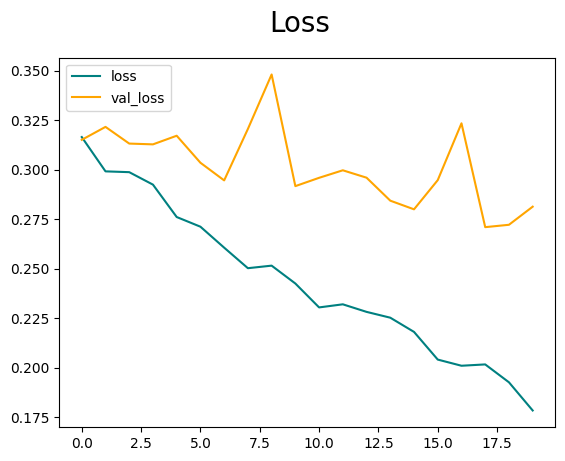

In [10]:
import matplotlib.pyplot as plt


fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [11]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [12]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [13]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

NameError: name 'test' is not defined